In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from PIL import Image
import os
from pathlib import Path
import os, time, pickle, argparse, networks, utils
from conv2d_mtl import Conv2dMtl
import torch



In [14]:
image = Image.open('/Users/stevenliu/tmp/test_output/8.png')


In [15]:
image = np.asarray(image)

In [18]:
image.shape

(256, 512, 3)

In [19]:
new = image.copy()
c1 = image[:,:,0]
c2 = image[:,:,1]
c3 = image[:,:,2]

<IPython.core.display.Javascript object>


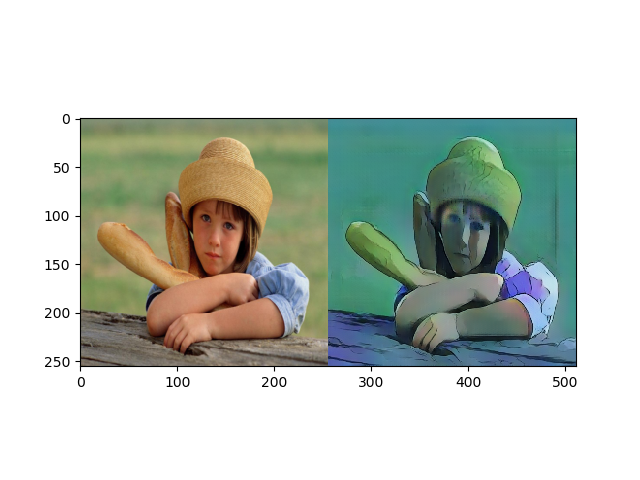

In [30]:
new[:,:,0] = c1
new[:,:,1] = c2
new[:,:,2] = c3
plt.imshow(new)

In [5]:
path = "/home/stevenliu/jojo-project/baseline/data/images"
onlyfiles = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
onlyfiles.sort()

In [8]:
trainfiles = onlyfiles[:5400]

In [9]:
trainfiles

['000001163.jpg',
 '000003072.jpg',
 '000004812.jpg',
 '000005283.jpg',
 '000013469.jpg',
 '000015774.jpg',
 '000022704.jpg',
 '000024087.jpg',
 '000024100.jpg',
 '000024293.jpg',
 '000025245.jpg',
 '000030708.jpg',
 '000030973.jpg',
 '000033016.jpg',
 '000040154.jpg',
 '000041029.jpg',
 '000050999.jpg',
 '000055418.jpg',
 '000059794.jpg',
 '000061164.jpg',
 '000065339.jpg',
 '000071686.jpg',
 '000078951.jpg',
 '000085370.jpg',
 '000090584.jpg',
 '000094304.jpg',
 '000094342.jpg',
 '000099186.jpg',
 '000099899.jpg',
 '000109154.jpg',
 '000111209.jpg',
 '000114595.jpg',
 '000120361.jpg',
 '000124344.jpg',
 '000128443.jpg',
 '000131987.jpg',
 '000133364.jpg',
 '000135363.jpg',
 '000141822.jpg',
 '000142573.jpg',
 '000142834.jpg',
 '000144722.jpg',
 '000147382.jpg',
 '000156511.jpg',
 '000165249.jpg',
 '000170503.jpg',
 '000172482.jpg',
 '000187274.jpg',
 '000199214.jpg',
 '000208064.jpg',
 '000208151.jpg',
 '000214092.jpg',
 '000234747.jpg',
 '000245459.jpg',
 '000249545.jpg',
 '00025217

In [11]:
train_path = '/home/stevenliu/jojo-project/baseline/data/src/train'
for i in trainfiles:
    Path(os.path.join(path, i)).rename(os.path.join(train_path, i))


In [14]:
testfiles = onlyfiles[5400:6150]

In [16]:
test_path = '/home/stevenliu/jojo-project/baseline/data/src/test'
for i in testfiles:
    Path(os.path.join(path, i)).rename(os.path.join(test_path, i))


In [39]:
test_path = '/home/stevenliu/test'
for i in onlyfiles[9000:9020]:
    Path(os.path.join(path, i)).rename(os.path.join(test_path, i))


In [29]:
jojo_path = '/home/stevenliu/jojo-project/baseline/data/jojo/05'
jojo_filenames = []
for s in os.listdir(jojo_path):
    if os.path.isdir(os.path.join(jojo_path, s)):
        subdir = os.path.join(jojo_path, s)
        for f in os.listdir(subdir):
            filepath = os.path.join(subdir, f)
            if os.path.isfile(filepath):
                jojo_filenames.append(filepath)
        
jojo_filenames.sort()

In [30]:
jojo_path = '/home/stevenliu/jojo-project/baseline/data/tgt/train'
j = 0
for i in jojo_filenames[:5000]:
    Path(i).rename(os.path.join(jojo_path, str(j)+'.jpg'))
    j += 1

In [ ]:
# edge-promoting
if not os.path.isdir(os.path.join('data', args.tgt_data, 'pair')):
    print('edge-promoting start!!')
    edge_promoting(os.path.join('data', args.tgt_data, 'train'), os.path.join('data', args.tgt_data, 'pair'))
else:
    print('edge-promoting already done')

In [ ]:
import threading 
import concurrent.futures
with ThreadPoolExecutor(max_workers=8) as executor:
    future = executor.submit(pow, 323, 1235)

In [38]:
from concurrent.futures import ProcessPoolExecutor
import edge_promoting_thread
root = os.path.join('data', 'tgt', 'train')
save = os.path.join('/home/stevenliu', 'pair')
cores = 5
def main():
    file_list = os.listdir(root)
    num_data = len(file_list)
    indics = int(num_data/cores)
    with ProcessPoolExecutor(max_workers=cores) as executor:
        for i in range(cores):
            executor.submit(edge_promoting_thread.edge_promoting, root, file_list[i*indics:(i+1)*indics], save)

main()



  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 1/1000 [00:00<04:11,  3.97it/s]

  0%|          | 1/1000 [00:01<22:44,  1.37s/it]

  0%|          | 1/1000 [00:01<26:42,  1.60s/it]

  0%|          | 1/1000 [00:01<28:22,  1.70s/it]

  0%|          | 2/1000 [00:01<11:37,  1.43it/s]

  0%|          | 1/1000 [00:02<36:04,  2.17s/it]

  0%|          | 3/1000 [00:02<20:56,  1.26s/it]

  0%|          | 2/1000 [00:02<24:55,  1.50s/it]

  0%|          | 2/1000 [00:03<31:09,  1.87s/it]

  0%|          | 4/1000 [00:03<19:49,  1.19s/it]

  0%|          | 2/1000 [00:03<27:45,  1.67s/it]

  0%|          | 3/1000 [00:04<19:01,  1.14s/it]

  0%|          | 3/1000 [00:04<24:55,  1.50s/it]

  0%|          | 3/1000 [00:04<27:22,  1.65s/it]

  0%|          | 3/1000 [00:05<25:55,  1.56s/it]

  0%|          | 4/1000 [00:05<25:39, 

  6%|▌         | 58/1000 [01:31<27:17,  1.74s/it]

  5%|▌         | 54/1000 [01:31<25:37,  1.62s/it]

  6%|▌         | 57/1000 [01:32<23:23,  1.49s/it]

  6%|▋         | 65/1000 [01:32<26:09,  1.68s/it]

  6%|▌         | 57/1000 [01:32<27:22,  1.74s/it]

  7%|▋         | 66/1000 [01:33<22:05,  1.42s/it]

  6%|▌         | 55/1000 [01:33<26:34,  1.69s/it]

  6%|▌         | 59/1000 [01:33<29:07,  1.86s/it]

  6%|▌         | 58/1000 [01:33<24:52,  1.58s/it]

  6%|▌         | 58/1000 [01:34<27:17,  1.74s/it]

  7%|▋         | 67/1000 [01:34<22:10,  1.43s/it]

  6%|▌         | 56/1000 [01:34<23:49,  1.51s/it]

  6%|▌         | 59/1000 [01:34<22:35,  1.44s/it]

  7%|▋         | 68/1000 [01:35<19:02,  1.23s/it]

  6%|▌         | 60/1000 [01:35<18:53,  1.21s/it]

  6%|▌         | 60/1000 [01:35<30:17,  1.93s/it]

  6%|▌         | 59/1000 [01:36<27:06,  1.73s/it]

  6%|▌         | 57/1000 [01:36<24:02,  1.53s/it]

  7%|▋         | 69/1000 [01:36<18:03,  1.16s/it]

  6%|▌         | 61/1000 [01:36

 12%|█▏        | 117/1000 [02:57<18:19,  1.25s/it]

 11%|█         | 110/1000 [02:58<21:33,  1.45s/it]

 12%|█▏        | 115/1000 [02:58<24:51,  1.69s/it]

 12%|█▏        | 124/1000 [02:58<23:07,  1.58s/it]

 12%|█▏        | 116/1000 [02:59<20:05,  1.36s/it]

 11%|█         | 112/1000 [02:59<24:57,  1.69s/it]

 12%|█▏        | 118/1000 [02:59<20:46,  1.41s/it]

 12%|█▏        | 117/1000 [02:59<16:41,  1.13s/it]

 12%|█▎        | 125/1000 [03:00<22:56,  1.57s/it]

 11%|█▏        | 113/1000 [03:00<22:45,  1.54s/it]

 11%|█         | 111/1000 [03:00<25:04,  1.69s/it]

 12%|█▏        | 118/1000 [03:01<17:55,  1.22s/it]

 11%|█         | 112/1000 [03:01<23:27,  1.58s/it]

 12%|█▏        | 119/1000 [03:01<23:51,  1.62s/it]

 13%|█▎        | 126/1000 [03:01<23:47,  1.63s/it]

 12%|█▏        | 119/1000 [03:02<16:41,  1.14s/it]

 11%|█▏        | 114/1000 [03:02<25:07,  1.70s/it]

 12%|█▏        | 120/1000 [03:02<21:55,  1.49s/it]

 11%|█▏        | 113/1000 [03:03<22:19,  1.51s/it]

 13%|█▎     

 16%|█▋        | 165/1000 [04:28<23:14,  1.67s/it]

 17%|█▋        | 167/1000 [04:28<25:11,  1.81s/it]

 18%|█▊        | 176/1000 [04:28<22:04,  1.61s/it]

 18%|█▊        | 180/1000 [04:28<25:11,  1.84s/it]

 17%|█▋        | 173/1000 [04:29<20:40,  1.50s/it]

 17%|█▋        | 166/1000 [04:29<21:59,  1.58s/it]

 18%|█▊        | 177/1000 [04:29<21:07,  1.54s/it]

 17%|█▋        | 168/1000 [04:30<26:33,  1.92s/it]

 17%|█▋        | 174/1000 [04:30<20:53,  1.52s/it]

 18%|█▊        | 181/1000 [04:31<26:24,  1.93s/it]

 18%|█▊        | 178/1000 [04:31<19:26,  1.42s/it]

 17%|█▋        | 167/1000 [04:31<22:38,  1.63s/it]

 18%|█▊        | 175/1000 [04:32<20:08,  1.46s/it]

 17%|█▋        | 169/1000 [04:32<25:24,  1.83s/it]

 18%|█▊        | 182/1000 [04:32<25:16,  1.85s/it]

 18%|█▊        | 179/1000 [04:33<21:51,  1.60s/it]

 17%|█▋        | 168/1000 [04:33<23:04,  1.66s/it]

 18%|█▊        | 183/1000 [04:33<21:35,  1.59s/it]

 18%|█▊        | 176/1000 [04:33<21:13,  1.55s/it]

 17%|█▋     

 23%|██▎       | 231/1000 [05:59<21:44,  1.70s/it]

 22%|██▏       | 219/1000 [05:59<17:08,  1.32s/it]

 23%|██▎       | 233/1000 [05:59<25:57,  2.03s/it]

 23%|██▎       | 226/1000 [05:59<24:43,  1.92s/it]

 22%|██▏       | 220/1000 [06:00<15:51,  1.22s/it]

 24%|██▎       | 235/1000 [06:00<18:09,  1.42s/it]

 23%|██▎       | 232/1000 [06:00<21:25,  1.67s/it]

 24%|██▎       | 236/1000 [06:01<16:42,  1.31s/it]

 23%|██▎       | 227/1000 [06:01<23:44,  1.84s/it]

 22%|██▏       | 221/1000 [06:01<17:02,  1.31s/it]

 23%|██▎       | 233/1000 [06:01<19:50,  1.55s/it]

 23%|██▎       | 234/1000 [06:02<26:51,  2.10s/it]

 22%|██▏       | 222/1000 [06:02<13:43,  1.06s/it]

 22%|██▏       | 223/1000 [06:02<11:52,  1.09it/s]

 23%|██▎       | 228/1000 [06:02<21:54,  1.70s/it]

 23%|██▎       | 234/1000 [06:03<18:18,  1.43s/it]

 24%|██▎       | 237/1000 [06:03<19:37,  1.54s/it]

 24%|██▎       | 235/1000 [06:03<24:12,  1.90s/it]

 23%|██▎       | 229/1000 [06:03<19:05,  1.49s/it]

 24%|██▎    

 29%|██▉       | 291/1000 [07:27<17:23,  1.47s/it]

 29%|██▊       | 286/1000 [07:27<18:14,  1.53s/it]

 28%|██▊       | 281/1000 [07:27<18:49,  1.57s/it]

 28%|██▊       | 281/1000 [07:28<17:47,  1.48s/it]

 29%|██▉       | 289/1000 [07:28<20:42,  1.75s/it]

 29%|██▉       | 292/1000 [07:29<18:16,  1.55s/it]

 29%|██▊       | 287/1000 [07:29<18:47,  1.58s/it]

 28%|██▊       | 282/1000 [07:29<16:07,  1.35s/it]

 28%|██▊       | 282/1000 [07:29<20:11,  1.69s/it]

 29%|██▉       | 290/1000 [07:30<20:26,  1.73s/it]

 29%|██▉       | 288/1000 [07:30<18:04,  1.52s/it]

 28%|██▊       | 283/1000 [07:30<16:26,  1.38s/it]

 29%|██▉       | 293/1000 [07:31<18:58,  1.61s/it]

 28%|██▊       | 283/1000 [07:31<20:50,  1.74s/it]

 29%|██▉       | 289/1000 [07:32<17:31,  1.48s/it]

 29%|██▉       | 291/1000 [07:32<21:09,  1.79s/it]

 28%|██▊       | 284/1000 [07:33<18:49,  1.58s/it]

 29%|██▉       | 294/1000 [07:33<20:14,  1.72s/it]

 28%|██▊       | 284/1000 [07:33<21:42,  1.82s/it]

 29%|██▉    

 34%|███▍      | 340/1000 [08:57<17:15,  1.57s/it]

 34%|███▍      | 344/1000 [08:57<17:30,  1.60s/it]

 34%|███▍      | 340/1000 [08:57<20:16,  1.84s/it]

 34%|███▍      | 343/1000 [08:58<15:18,  1.40s/it]

 34%|███▍      | 345/1000 [08:58<14:58,  1.37s/it]

 35%|███▍      | 346/1000 [08:58<18:35,  1.71s/it]

 34%|███▍      | 341/1000 [08:59<19:31,  1.78s/it]

 34%|███▍      | 341/1000 [09:00<21:05,  1.92s/it]

 34%|███▍      | 344/1000 [09:00<16:35,  1.52s/it]

 35%|███▍      | 346/1000 [09:00<16:20,  1.50s/it]

 34%|███▍      | 342/1000 [09:00<17:28,  1.59s/it]

 35%|███▍      | 347/1000 [09:01<20:27,  1.88s/it]

 34%|███▍      | 345/1000 [09:01<15:40,  1.44s/it]

 35%|███▍      | 348/1000 [09:02<18:11,  1.67s/it]

 34%|███▍      | 342/1000 [09:02<21:28,  1.96s/it]

 35%|███▍      | 347/1000 [09:02<17:36,  1.62s/it]

 34%|███▍      | 343/1000 [09:02<16:58,  1.55s/it]

 35%|███▍      | 346/1000 [09:02<15:26,  1.42s/it]

 35%|███▍      | 349/1000 [09:03<15:25,  1.42s/it]

 34%|███▍   

 40%|███▉      | 398/1000 [10:29<16:00,  1.60s/it]

 40%|███▉      | 399/1000 [10:30<15:50,  1.58s/it]

 40%|████      | 402/1000 [10:31<16:50,  1.69s/it]

 40%|███▉      | 399/1000 [10:31<15:09,  1.51s/it]

 40%|████      | 401/1000 [10:31<19:05,  1.91s/it]

 40%|███▉      | 399/1000 [10:31<15:30,  1.55s/it]

 40%|████      | 400/1000 [10:32<14:21,  1.44s/it]

 40%|████      | 400/1000 [10:32<16:32,  1.65s/it]

 40%|████      | 403/1000 [10:32<16:26,  1.65s/it]

 40%|████      | 400/1000 [10:32<14:12,  1.42s/it]

 40%|████      | 404/1000 [10:33<13:43,  1.38s/it]

 40%|████      | 401/1000 [10:33<12:53,  1.29s/it]

 40%|████      | 402/1000 [10:33<19:53,  2.00s/it]

 40%|████      | 401/1000 [10:34<14:22,  1.44s/it]

 40%|████      | 405/1000 [10:34<11:23,  1.15s/it]

 40%|████      | 401/1000 [10:34<16:34,  1.66s/it]

 40%|████      | 403/1000 [10:35<18:26,  1.85s/it]

 40%|████      | 402/1000 [10:35<13:45,  1.38s/it]

 40%|████      | 402/1000 [10:35<15:13,  1.53s/it]

 40%|████   

 45%|████▌     | 453/1000 [11:59<15:12,  1.67s/it]

 46%|████▌     | 456/1000 [12:00<17:17,  1.91s/it]

 46%|████▌     | 458/1000 [12:01<13:18,  1.47s/it]

 46%|████▌     | 455/1000 [12:01<15:59,  1.76s/it]

 46%|████▌     | 461/1000 [12:01<15:48,  1.76s/it]

 46%|████▌     | 456/1000 [12:01<12:08,  1.34s/it]

 45%|████▌     | 454/1000 [12:02<17:08,  1.88s/it]

 46%|████▌     | 457/1000 [12:02<17:11,  1.90s/it]

 46%|████▌     | 459/1000 [12:02<14:19,  1.59s/it]

 46%|████▌     | 457/1000 [12:03<12:56,  1.43s/it]

 46%|████▌     | 462/1000 [12:03<16:39,  1.86s/it]

 46%|████▌     | 458/1000 [12:03<16:19,  1.81s/it]

 46%|████▌     | 458/1000 [12:04<11:31,  1.28s/it]

 46%|████▌     | 455/1000 [12:04<17:57,  1.98s/it]

 46%|████▌     | 460/1000 [12:04<13:54,  1.55s/it]

 46%|████▋     | 463/1000 [12:05<15:57,  1.78s/it]

 46%|████▌     | 456/1000 [12:05<16:49,  1.86s/it]

 46%|████▌     | 459/1000 [12:05<16:45,  1.86s/it]

 46%|████▌     | 461/1000 [12:06<14:06,  1.57s/it]

 46%|████▌  

 51%|█████▏    | 514/1000 [13:29<15:00,  1.85s/it]

 51%|█████     | 510/1000 [13:30<13:13,  1.62s/it]

 51%|█████▏    | 513/1000 [13:30<13:52,  1.71s/it]

 52%|█████▏    | 515/1000 [13:31<15:56,  1.97s/it]

 52%|█████▏    | 515/1000 [13:31<13:00,  1.61s/it]

 51%|█████     | 511/1000 [13:31<12:41,  1.56s/it]

 52%|█████▏    | 515/1000 [13:31<14:57,  1.85s/it]

 51%|█████▏    | 514/1000 [13:32<13:13,  1.63s/it]

 52%|█████▏    | 516/1000 [13:32<12:17,  1.52s/it]

 52%|█████▏    | 516/1000 [13:32<11:37,  1.44s/it]

 52%|█████▏    | 516/1000 [13:32<14:23,  1.78s/it]

 52%|█████▏    | 517/1000 [13:33<10:50,  1.35s/it]

 52%|█████▏    | 515/1000 [13:33<13:28,  1.67s/it]

 51%|█████     | 512/1000 [13:33<14:53,  1.83s/it]

 52%|█████▏    | 517/1000 [13:34<13:14,  1.64s/it]

 52%|█████▏    | 517/1000 [13:34<14:43,  1.83s/it]

 52%|█████▏    | 516/1000 [13:35<12:28,  1.55s/it]

 52%|█████▏    | 518/1000 [13:35<12:49,  1.60s/it]

 51%|█████▏    | 513/1000 [13:35<14:52,  1.83s/it]

 52%|█████▏ 

 57%|█████▊    | 575/1000 [14:59<08:55,  1.26s/it]

 57%|█████▋    | 572/1000 [14:59<10:14,  1.44s/it]

 57%|█████▋    | 570/1000 [14:59<11:02,  1.54s/it]

 57%|█████▋    | 567/1000 [15:00<09:59,  1.39s/it]

 58%|█████▊    | 576/1000 [15:00<09:32,  1.35s/it]

 57%|█████▋    | 568/1000 [15:01<14:40,  2.04s/it]

 57%|█████▋    | 573/1000 [15:01<10:25,  1.46s/it]

 58%|█████▊    | 577/1000 [15:01<08:02,  1.14s/it]

 57%|█████▋    | 571/1000 [15:01<10:44,  1.50s/it]

 57%|█████▋    | 569/1000 [15:01<11:32,  1.61s/it]

 57%|█████▋    | 568/1000 [15:01<10:51,  1.51s/it]

 57%|█████▋    | 572/1000 [15:03<11:13,  1.57s/it]

 57%|█████▋    | 573/1000 [15:03<08:04,  1.14s/it]

 57%|█████▋    | 574/1000 [15:03<11:31,  1.62s/it]

 58%|█████▊    | 578/1000 [15:03<10:33,  1.50s/it]

 57%|█████▋    | 570/1000 [15:03<12:25,  1.73s/it]

 57%|█████▋    | 571/1000 [15:03<09:14,  1.29s/it]

 57%|█████▋    | 569/1000 [15:04<14:05,  1.96s/it]

 57%|█████▋    | 574/1000 [15:05<09:33,  1.35s/it]

 57%|█████▊ 

 63%|██████▎   | 629/1000 [16:25<07:14,  1.17s/it]

 62%|██████▏   | 620/1000 [16:25<10:16,  1.62s/it]

 63%|██████▎   | 627/1000 [16:26<09:01,  1.45s/it]

 62%|██████▏   | 621/1000 [16:27<09:40,  1.53s/it]

 63%|██████▎   | 631/1000 [16:27<09:28,  1.54s/it]

 63%|██████▎   | 631/1000 [16:27<10:09,  1.65s/it]

 63%|██████▎   | 630/1000 [16:27<08:37,  1.40s/it]

 63%|██████▎   | 631/1000 [16:27<06:35,  1.07s/it]

 63%|██████▎   | 628/1000 [16:28<08:48,  1.42s/it]

 63%|██████▎   | 632/1000 [16:28<09:40,  1.58s/it]

 62%|██████▏   | 622/1000 [16:29<10:20,  1.64s/it]

 63%|██████▎   | 632/1000 [16:29<10:27,  1.70s/it]

 63%|██████▎   | 632/1000 [16:29<07:34,  1.23s/it]

 63%|██████▎   | 629/1000 [16:29<09:11,  1.49s/it]

 63%|██████▎   | 633/1000 [16:29<05:41,  1.08it/s]

 63%|██████▎   | 633/1000 [16:30<09:47,  1.60s/it]

 63%|██████▎   | 630/1000 [16:30<08:14,  1.34s/it]

 63%|██████▎   | 633/1000 [16:30<10:09,  1.66s/it]

 63%|██████▎   | 634/1000 [16:31<06:24,  1.05s/it]

 62%|██████▏

 68%|██████▊   | 678/1000 [17:51<05:52,  1.09s/it]

 69%|██████▉   | 690/1000 [17:52<08:09,  1.58s/it]

 69%|██████▊   | 687/1000 [17:52<08:06,  1.55s/it]

 68%|██████▊   | 683/1000 [17:52<08:58,  1.70s/it]

 69%|██████▊   | 686/1000 [17:53<08:13,  1.57s/it]

 69%|██████▉   | 691/1000 [17:53<07:27,  1.45s/it]

 68%|██████▊   | 679/1000 [17:53<06:51,  1.28s/it]

 69%|██████▉   | 688/1000 [17:54<08:40,  1.67s/it]

 68%|██████▊   | 684/1000 [17:54<09:03,  1.72s/it]

 69%|██████▊   | 687/1000 [17:54<08:10,  1.57s/it]

 68%|██████▊   | 680/1000 [17:55<07:49,  1.47s/it]

 69%|██████▉   | 692/1000 [17:55<08:22,  1.63s/it]

 69%|██████▉   | 689/1000 [17:55<07:52,  1.52s/it]

 69%|██████▉   | 688/1000 [17:56<07:51,  1.51s/it]

 68%|██████▊   | 685/1000 [17:56<08:59,  1.71s/it]

 69%|██████▉   | 690/1000 [17:57<07:52,  1.52s/it]

 69%|██████▉   | 693/1000 [17:57<08:32,  1.67s/it]

 69%|██████▉   | 689/1000 [17:57<07:16,  1.40s/it]

 69%|██████▊   | 686/1000 [17:57<08:43,  1.67s/it]

 68%|██████▊

 75%|███████▍  | 748/1000 [19:15<07:01,  1.67s/it]

 74%|███████▍  | 742/1000 [19:16<05:48,  1.35s/it]

 73%|███████▎  | 733/1000 [19:16<07:24,  1.67s/it]

 74%|███████▎  | 735/1000 [19:16<07:51,  1.78s/it]

 75%|███████▌  | 751/1000 [19:17<06:24,  1.54s/it]

 74%|███████▎  | 736/1000 [19:17<06:21,  1.44s/it]

 73%|███████▎  | 734/1000 [19:17<06:49,  1.54s/it]

 75%|███████▍  | 749/1000 [19:17<07:41,  1.84s/it]

 74%|███████▍  | 743/1000 [19:17<05:52,  1.37s/it]

 74%|███████▎  | 737/1000 [19:18<05:43,  1.31s/it]

 75%|███████▌  | 751/1000 [19:18<06:12,  1.50s/it]

 74%|███████▍  | 744/1000 [19:19<05:49,  1.37s/it]

 75%|███████▌  | 752/1000 [19:19<07:04,  1.71s/it]

 74%|███████▍  | 738/1000 [19:19<05:17,  1.21s/it]

 74%|███████▎  | 735/1000 [19:19<07:26,  1.68s/it]

 74%|███████▍  | 739/1000 [19:20<04:39,  1.07s/it]

 74%|███████▍  | 745/1000 [19:20<05:58,  1.41s/it]

 74%|███████▍  | 740/1000 [19:20<04:09,  1.04it/s]

 75%|███████▌  | 752/1000 [19:20<06:46,  1.64s/it]

 75%|███████

 80%|████████  | 803/1000 [20:38<05:13,  1.59s/it]

 81%|████████  | 810/1000 [20:40<03:36,  1.14s/it]

 79%|███████▉  | 791/1000 [20:40<05:16,  1.52s/it]

 79%|███████▉  | 790/1000 [20:40<06:10,  1.76s/it]

 80%|███████▉  | 799/1000 [20:40<05:34,  1.66s/it]

 80%|████████  | 804/1000 [20:40<05:20,  1.64s/it]

 80%|████████  | 805/1000 [20:41<04:53,  1.50s/it]

 81%|████████  | 811/1000 [20:42<04:12,  1.34s/it]

 79%|███████▉  | 792/1000 [20:42<05:31,  1.59s/it]

 80%|████████  | 800/1000 [20:42<05:46,  1.73s/it]

 79%|███████▉  | 791/1000 [20:42<06:32,  1.88s/it]

 79%|███████▉  | 793/1000 [20:42<04:37,  1.34s/it]

 81%|████████  | 812/1000 [20:43<04:10,  1.33s/it]

 79%|███████▉  | 794/1000 [20:43<03:51,  1.13s/it]

 81%|████████  | 806/1000 [20:43<04:59,  1.55s/it]

 79%|███████▉  | 792/1000 [20:43<05:47,  1.67s/it]

 80%|████████  | 801/1000 [20:43<05:29,  1.65s/it]

 79%|███████▉  | 793/1000 [20:44<04:36,  1.33s/it]

 81%|████████▏ | 813/1000 [20:44<03:59,  1.28s/it]

 80%|███████

 86%|████████▌ | 855/1000 [22:02<02:46,  1.15s/it]

 85%|████████▍ | 848/1000 [22:02<03:16,  1.29s/it]

 86%|████████▋ | 865/1000 [22:02<03:51,  1.71s/it]

 85%|████████▌ | 853/1000 [22:03<03:41,  1.51s/it]

 85%|████████▍ | 849/1000 [22:03<03:07,  1.24s/it]

 86%|████████▌ | 859/1000 [22:04<03:37,  1.54s/it]

 87%|████████▋ | 866/1000 [22:04<03:40,  1.65s/it]

 86%|████████▌ | 856/1000 [22:04<03:23,  1.41s/it]

 85%|████████▌ | 854/1000 [22:05<03:57,  1.63s/it]

 85%|████████▌ | 850/1000 [22:05<03:14,  1.30s/it]

 86%|████████▌ | 857/1000 [22:05<03:07,  1.31s/it]

 86%|████████▌ | 860/1000 [22:05<03:27,  1.48s/it]

 87%|████████▋ | 867/1000 [22:06<03:45,  1.69s/it]

 86%|████████▌ | 855/1000 [22:06<03:39,  1.51s/it]

 85%|████████▌ | 851/1000 [22:06<03:02,  1.23s/it]

 86%|████████▌ | 858/1000 [22:07<03:21,  1.42s/it]

 85%|████████▌ | 852/1000 [22:07<02:51,  1.16s/it]

 86%|████████▌ | 861/1000 [22:07<03:51,  1.66s/it]

 87%|████████▋ | 868/1000 [22:07<03:40,  1.67s/it]

 87%|███████

 92%|█████████▏| 916/1000 [23:23<02:04,  1.49s/it]

 91%|█████████ | 912/1000 [23:23<01:43,  1.18s/it]

 92%|█████████▏| 922/1000 [23:23<01:46,  1.37s/it]

 91%|█████████ | 909/1000 [23:24<01:50,  1.21s/it]

 91%|█████████ | 906/1000 [23:24<02:02,  1.30s/it]

 91%|█████████ | 910/1000 [23:24<01:28,  1.01it/s]

 92%|█████████▏| 923/1000 [23:24<01:31,  1.19s/it]

 91%|█████████ | 911/1000 [23:25<01:25,  1.04it/s]

 91%|█████████▏| 913/1000 [23:25<01:58,  1.36s/it]

 92%|█████████▏| 924/1000 [23:25<01:31,  1.21s/it]

 92%|█████████▏| 917/1000 [23:26<02:25,  1.75s/it]

 91%|█████████▏| 914/1000 [23:26<01:37,  1.13s/it]

 91%|█████████ | 907/1000 [23:26<02:23,  1.54s/it]

 92%|█████████▏| 918/1000 [23:27<02:08,  1.57s/it]

 91%|█████████ | 912/1000 [23:27<01:52,  1.28s/it]

 92%|█████████▏| 915/1000 [23:27<01:37,  1.15s/it]

 91%|█████████ | 908/1000 [23:27<02:09,  1.41s/it]

 92%|█████████▎| 925/1000 [23:27<01:49,  1.46s/it]

 91%|█████████ | 909/1000 [23:28<02:05,  1.38s/it]

 92%|███████

 97%|█████████▋| 966/1000 [24:55<00:36,  1.06s/it]

 97%|█████████▋| 966/1000 [24:56<00:58,  1.72s/it]

 98%|█████████▊| 980/1000 [24:57<00:35,  1.79s/it]

 96%|█████████▋| 965/1000 [24:57<01:08,  1.96s/it]

 97%|█████████▋| 967/1000 [24:57<00:41,  1.26s/it]

 97%|█████████▋| 974/1000 [24:57<01:01,  2.38s/it]

 97%|█████████▋| 967/1000 [24:58<00:50,  1.53s/it]

 97%|█████████▋| 968/1000 [24:58<00:31,  1.01it/s]

 97%|█████████▋| 966/1000 [24:59<01:01,  1.81s/it]

 97%|█████████▋| 968/1000 [25:00<00:53,  1.66s/it]

 98%|█████████▊| 981/1000 [25:00<00:40,  2.14s/it]

 98%|█████████▊| 975/1000 [25:00<01:00,  2.44s/it]

 97%|█████████▋| 969/1000 [25:00<00:43,  1.39s/it]

 97%|█████████▋| 967/1000 [25:01<01:06,  2.01s/it]

 97%|█████████▋| 969/1000 [25:01<00:52,  1.68s/it]

 97%|█████████▋| 970/1000 [25:01<00:42,  1.42s/it]

 98%|█████████▊| 982/1000 [25:02<00:38,  2.11s/it]

 98%|█████████▊| 976/1000 [25:02<00:57,  2.38s/it]

 97%|█████████▋| 970/1000 [25:02<00:46,  1.55s/it]

 98%|███████

In [6]:
a = torch.load("./pretrained_model/Hayao_net_G_float.pth")

In [18]:
for name in a.keys():
    print(name)

conv01_1.weight
conv01_1.bias
in01_1.scale
in01_1.shift
conv02_1.weight
conv02_1.bias
conv02_2.weight
conv02_2.bias
in02_1.scale
in02_1.shift
conv03_1.weight
conv03_1.bias
conv03_2.weight
conv03_2.bias
in03_1.scale
in03_1.shift
conv04_1.weight
conv04_1.bias
in04_1.scale
in04_1.shift
conv04_2.weight
conv04_2.bias
in04_2.scale
in04_2.shift
conv05_1.weight
conv05_1.bias
in05_1.scale
in05_1.shift
conv05_2.weight
conv05_2.bias
in05_2.scale
in05_2.shift
conv06_1.weight
conv06_1.bias
in06_1.scale
in06_1.shift
conv06_2.weight
conv06_2.bias
in06_2.scale
in06_2.shift
conv07_1.weight
conv07_1.bias
in07_1.scale
in07_1.shift
conv07_2.weight
conv07_2.bias
in07_2.scale
in07_2.shift
conv08_1.weight
conv08_1.bias
in08_1.scale
in08_1.shift
conv08_2.weight
conv08_2.bias
in08_2.scale
in08_2.shift
conv09_1.weight
conv09_1.bias
in09_1.scale
in09_1.shift
conv09_2.weight
conv09_2.bias
in09_2.scale
in09_2.shift
conv10_1.weight
conv10_1.bias
in10_1.scale
in10_1.shift
conv10_2.weight
conv10_2.bias
in10_2.scale
i

In [9]:
encoder = networks.TransformerEncoder(conv=Conv2dMtl)

In [19]:
encoder.load_state_dict(a, strict=False)

_IncompatibleKeys(missing_keys=['conv01_1.mtl_weight', 'conv01_1.mtl_bias', 'conv02_1.mtl_weight', 'conv02_1.mtl_bias', 'conv02_2.mtl_weight', 'conv02_2.mtl_bias', 'conv03_1.mtl_weight', 'conv03_1.mtl_bias', 'conv03_2.mtl_weight', 'conv03_2.mtl_bias', 'conv04_1.mtl_weight', 'conv04_1.mtl_bias', 'conv04_2.mtl_weight', 'conv04_2.mtl_bias', 'conv05_1.mtl_weight', 'conv05_1.mtl_bias', 'conv05_2.mtl_weight', 'conv05_2.mtl_bias', 'conv06_1.mtl_weight', 'conv06_1.mtl_bias', 'conv06_2.mtl_weight', 'conv06_2.mtl_bias', 'conv07_1.mtl_weight', 'conv07_1.mtl_bias', 'conv07_2.mtl_weight', 'conv07_2.mtl_bias'], unexpected_keys=['conv08_1.weight', 'conv08_1.bias', 'in08_1.scale', 'in08_1.shift', 'conv08_2.weight', 'conv08_2.bias', 'in08_2.scale', 'in08_2.shift', 'conv09_1.weight', 'conv09_1.bias', 'in09_1.scale', 'in09_1.shift', 'conv09_2.weight', 'conv09_2.bias', 'in09_2.scale', 'in09_2.shift', 'conv10_1.weight', 'conv10_1.bias', 'in10_1.scale', 'in10_1.shift', 'conv10_2.weight', 'conv10_2.bias', 'i

In [14]:
for name, param in encoder.named_parameters():
    print(name)

conv01_1.weight
conv01_1.mtl_weight
conv01_1.bias
conv01_1.mtl_bias
in01_1.scale
in01_1.shift
conv02_1.weight
conv02_1.mtl_weight
conv02_1.bias
conv02_1.mtl_bias
conv02_2.weight
conv02_2.mtl_weight
conv02_2.bias
conv02_2.mtl_bias
in02_1.scale
in02_1.shift
conv03_1.weight
conv03_1.mtl_weight
conv03_1.bias
conv03_1.mtl_bias
conv03_2.weight
conv03_2.mtl_weight
conv03_2.bias
conv03_2.mtl_bias
in03_1.scale
in03_1.shift
conv04_1.weight
conv04_1.mtl_weight
conv04_1.bias
conv04_1.mtl_bias
in04_1.scale
in04_1.shift
conv04_2.weight
conv04_2.mtl_weight
conv04_2.bias
conv04_2.mtl_bias
in04_2.scale
in04_2.shift
conv05_1.weight
conv05_1.mtl_weight
conv05_1.bias
conv05_1.mtl_bias
in05_1.scale
in05_1.shift
conv05_2.weight
conv05_2.mtl_weight
conv05_2.bias
conv05_2.mtl_bias
in05_2.scale
in05_2.shift
conv06_1.weight
conv06_1.mtl_weight
conv06_1.bias
conv06_1.mtl_bias
in06_1.scale
in06_1.shift
conv06_2.weight
conv06_2.mtl_weight
conv06_2.bias
conv06_2.mtl_bias
in06_2.scale
in06_2.shift
conv07_1.weight
co

In [16]:
decoder = networks.TransformerDecoder(conv=Conv2dMtl)

In [20]:
decoder.load_state_dict(weight, strict=False)

_IncompatibleKeys(missing_keys=['conv08_1.mtl_weight', 'conv08_1.mtl_bias', 'conv08_2.mtl_weight', 'conv08_2.mtl_bias', 'conv09_1.mtl_weight', 'conv09_1.mtl_bias', 'conv09_2.mtl_weight', 'conv09_2.mtl_bias', 'conv10_1.mtl_weight', 'conv10_1.mtl_bias', 'conv10_2.mtl_weight', 'conv10_2.mtl_bias', 'conv11_1.mtl_weight', 'conv11_1.mtl_bias', 'conv11_2.mtl_weight', 'conv11_2.mtl_bias', 'deconv01_2.mtl_weight', 'deconv01_2.mtl_bias', 'deconv02_2.mtl_weight', 'deconv02_2.mtl_bias', 'deconv03_1.mtl_weight', 'deconv03_1.mtl_bias'], unexpected_keys=['conv01_1.weight', 'conv01_1.bias', 'in01_1.scale', 'in01_1.shift', 'conv02_1.weight', 'conv02_1.bias', 'conv02_2.weight', 'conv02_2.bias', 'in02_1.scale', 'in02_1.shift', 'conv03_1.weight', 'conv03_1.bias', 'conv03_2.weight', 'conv03_2.bias', 'in03_1.scale', 'in03_1.shift', 'conv04_1.weight', 'conv04_1.bias', 'in04_1.scale', 'in04_1.shift', 'conv04_2.weight', 'conv04_2.bias', 'in04_2.scale', 'in04_2.shift', 'conv05_1.weight', 'conv05_1.bias', 'in05_

In [17]:
for name, param in decoder.named_parameters():
    print(name)

conv08_1.weight
conv08_1.mtl_weight
conv08_1.bias
conv08_1.mtl_bias
in08_1.scale
in08_1.shift
conv08_2.weight
conv08_2.mtl_weight
conv08_2.bias
conv08_2.mtl_bias
in08_2.scale
in08_2.shift
conv09_1.weight
conv09_1.mtl_weight
conv09_1.bias
conv09_1.mtl_bias
in09_1.scale
in09_1.shift
conv09_2.weight
conv09_2.mtl_weight
conv09_2.bias
conv09_2.mtl_bias
in09_2.scale
in09_2.shift
conv10_1.weight
conv10_1.mtl_weight
conv10_1.bias
conv10_1.mtl_bias
in10_1.scale
in10_1.shift
conv10_2.weight
conv10_2.mtl_weight
conv10_2.bias
conv10_2.mtl_bias
in10_2.scale
in10_2.shift
conv11_1.weight
conv11_1.mtl_weight
conv11_1.bias
conv11_1.mtl_bias
in11_1.scale
in11_1.shift
conv11_2.weight
conv11_2.mtl_weight
conv11_2.bias
conv11_2.mtl_bias
in11_2.scale
in11_2.shift
deconv01_1.weight
deconv01_1.bias
deconv01_2.weight
deconv01_2.mtl_weight
deconv01_2.bias
deconv01_2.mtl_bias
in12_1.scale
in12_1.shift
deconv02_1.weight
deconv02_1.bias
deconv02_2.weight
deconv02_2.mtl_weight
deconv02_2.bias
deconv02_2.mtl_bias
in